# Extracción de características
Generalmente, la mayor parte de los datos de una imagen no corresponden directamente con un objeto de interés en la misma. La mayoría de los pixeles son parte del fondo de la imagen o de texturas repetitivas. Es por eso que, para poder procesar una imagen de forma correcta, es necesario extraer características de interés con el fin de analizarlas de manera más eficiente.

# Detección de esquinas
Se puede definir una esquina como una región en la imagen con una alta variación en intensidad en todas las direcciones. En OpenCV, contamos con varias formas de detectar esquinas en una imagen.
Por ejemplo, podemos usar el detector de Harris con la función `cornerHarris()`.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]    # incrementar tamaño de plots

def display_color_row(*imgs):
    for i, img in enumerate(imgs):
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

def display_gray_row(*imgs):
    for i, img in enumerate(imgs):
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])


In [ ]:
# Harris corner detector
edificio = cv2.imread("edificio.jpg")
img = edificio.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

esquinas = cv2.cornerHarris(gray, 2, 3, 0.04)
esquinas = cv2.dilate(esquinas, None)

img[esquinas>0.01*esquinas.max()]=[0,0,255]
display_gray_row(esquinas)
# display_color_row(img)


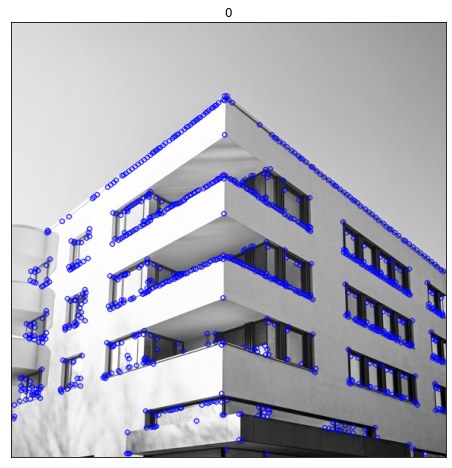

In [26]:
# FAST corners
img = edificio.copy()
fast = cv2.FastFeatureDetector_create()
fast.setThreshold(30)

kp = fast.detect(img, None)
# print(kp[0])
img2 = cv2.drawKeypoints(img, kp, None, color=(255, 0, 0))
display_color_row(img2)

## ORB
ORB es un algoritmo libre de patentes para la extracción de características o puntos de interés invariantes a la rotación. Estas características luego se pueden comparar o procesar por otro tipo de algoritmos para distintas tareas.


50


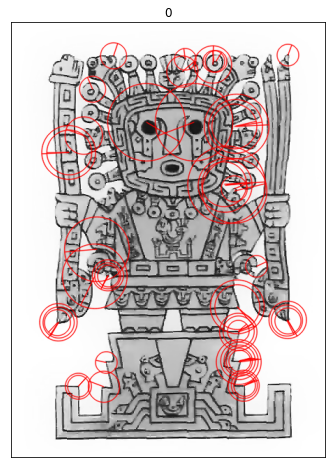

In [38]:
img = cv2.imread("viracocha.jpg",0)

orb = cv2.ORB_create(nfeatures=50)

kp = orb.detect(img, None)

kp, desc = orb.compute(img, kp)

print(len(kp))
img2 = cv2.drawKeypoints(img, kp, None, color=(0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

display_color_row(img2)

## Feature matching

In [68]:
train = cv2.imread("pikachu.png", 0)
query = cv2.imread("multi_pikachu.png", 0)

orb = cv2.ORB_create()

kp_train, desc_train = orb.detectAndCompute(train, None)
kp_query, desc_query = orb.detectAndCompute(query, None)


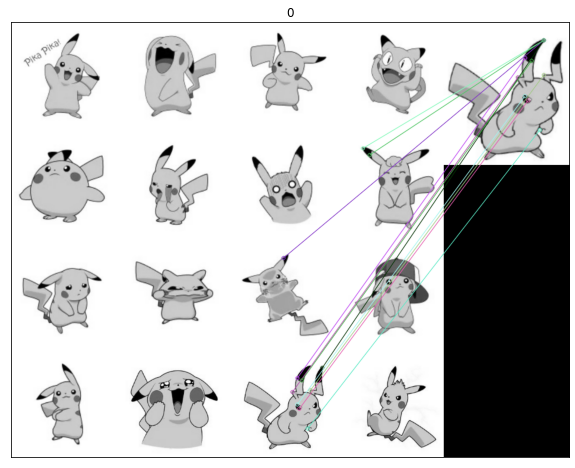

In [69]:
bf = cv2.BFMatcher()

matches = bf.knnMatch(desc_query, desc_train, k=2)
# matches = sorted(matches, key = lambda x:x.distance)

good = []
for m,n in matches:
    if m.distance < 0.65*n.distance:
        good.append([m])

result = cv2.drawMatchesKnn(
    query, 
    kp_query, 
    train, 
    kp_train, 
    good, 
    None, 
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

display_gray_row(result)

## Haar-cascades
Las cascadas Haar se usan para detectar objetos dentro imágenes, son bastante eficientes y pueden servir para realizar una detección rápida de ciertas características definidas como rostros y ojos. OpenCV ya cuenta con una implementación y modelos entrenados para estas tareas.

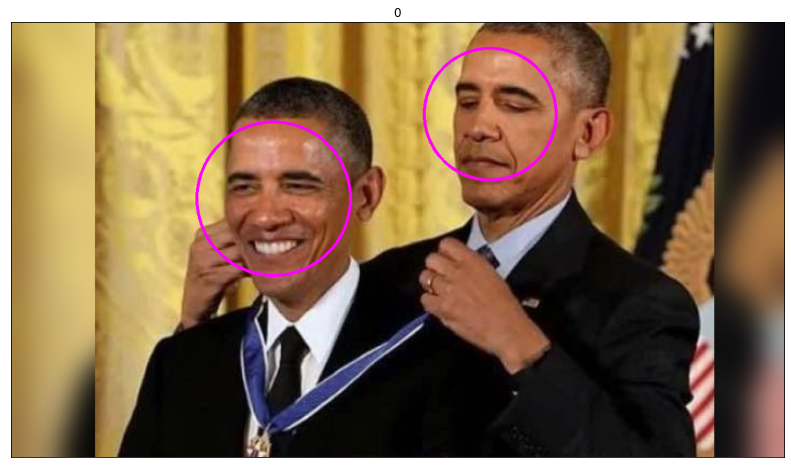

In [76]:
img = cv2.imread("obama2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

face_cascade = cv2.CascadeClassifier()
face_cascade.load("cascade/haarcascade_frontalface_alt.xml")

faces = face_cascade.detectMultiScale(gray)

for x, y, w, h in faces:
        center = (x + w//2, y + h//2)
        img = cv2.ellipse(img, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)

display_color_row(img)
